In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:
df = pd.read_csv('seeds_dataset.txt', sep='\s+', header=None)
y = np.array(df[7])
df = (df-df.mean())/df.std()
X = np.array(df.drop(columns=7))
X

array([[ 1.41759037e-01,  2.14948819e-01,  6.04573297e-05, ...,
         1.41364035e-01, -9.83800962e-01, -3.82663054e-01],
       [ 1.11613558e-02,  8.20415339e-03,  4.27493778e-01, ...,
         1.96961591e-01, -1.78390358e+00, -9.19815597e-01],
       [-1.91608729e-01, -3.59341919e-01,  1.43894490e+00, ...,
         2.07551602e-01, -6.65888201e-01, -1.18635720e+00],
       ...,
       [-5.66217868e-01, -6.88601941e-01,  7.32198720e-01, ...,
        -7.04361781e-02,  3.06925421e+00, -7.16348724e-01],
       [-1.03362010e+00, -1.03317638e+00, -7.99790014e-01, ...,
        -1.11884723e+00, -6.79727762e-02, -7.40764749e-01],
       [-8.75528167e-01, -9.33632656e-01, -1.09971883e-01, ...,
        -7.53491866e-01,  1.28814463e+00, -7.02106043e-01]])

In [4]:
seed = 42
k_cross = 5
k_neighbors = np.arange(1, 10)
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

In [5]:
pca = PCA(n_components=2)
X_trans = pca.fit_transform(X)

In [6]:
kf = KFold(n_splits=k_cross, shuffle=True, random_state=42)

In [8]:
acc = np.zeros((len(k_neighbors), len(metrics)))
acc

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

array([0., 0., 0., 0., 0.])

1 neighbors, euclidean metric: 0.9285714285714285
1 neighbors, manhattan metric: 0.9095238095238095
1 neighbors, chebyshev metric: 0.9142857142857144
1 neighbors, minkowski metric: 0.9285714285714285
2 neighbors, euclidean metric: 0.8904761904761905
2 neighbors, manhattan metric: 0.9047619047619048
2 neighbors, chebyshev metric: 0.9142857142857143
2 neighbors, minkowski metric: 0.8904761904761905
3 neighbors, euclidean metric: 0.9238095238095237
3 neighbors, manhattan metric: 0.9047619047619048
3 neighbors, chebyshev metric: 0.9285714285714286
3 neighbors, minkowski metric: 0.9238095238095237
4 neighbors, euclidean metric: 0.9285714285714286
4 neighbors, manhattan metric: 0.9285714285714286
4 neighbors, chebyshev metric: 0.9142857142857143
4 neighbors, minkowski metric: 0.9285714285714286
5 neighbors, euclidean metric: 0.9190476190476191
5 neighbors, manhattan metric: 0.9142857142857143
5 neighbors, chebyshev metric: 0.9238095238095237
5 neighbors, minkowski metric: 0.9190476190476191


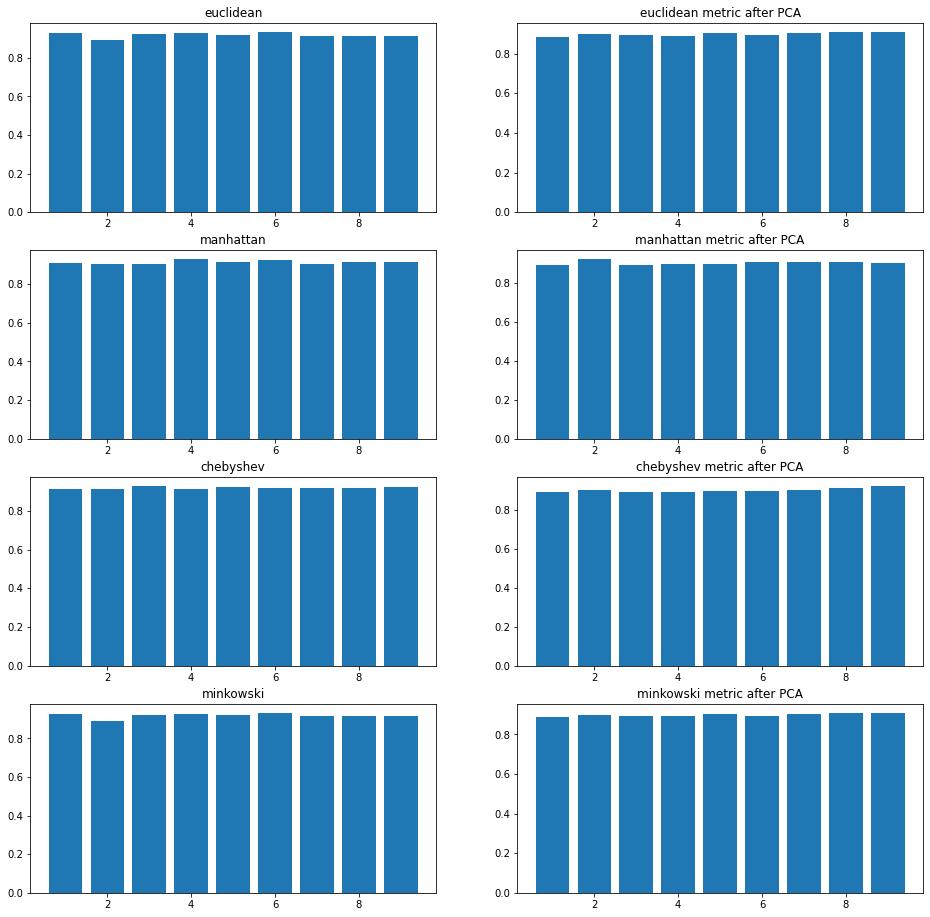

In [19]:
for ik, k in enumerate(k_neighbors):
  for im, metric in enumerate(metrics):
    temp_acc = np.zeros(k_cross)
    #this gonna store he accuracies o average for (metric, k_neighbors)
    clf = KNeighborsClassifier(n_neighbors=k, metric=metric)
    it = 0  #Bc I'm way too lazy to effectively use enumerate() on KFoldClassifier.split()
    for train_index, test_index in kf.split(X):
        clf.fit(X[train_index], y[train_index])
        labels_pred = clf.predict(X[test_index])
        temp_acc[it] = clf.score(X[test_index], y[test_index])
        it += 1
        if it >= 5:
            break
    
    acc[ik, im] = np.mean(temp_acc)
    print(f'{k} neighbors, {metric} metric: {acc[ik, im]}')

acc_trans = np.zeros((len(k_neighbors), len(metrics)))

for ik, k in enumerate(k_neighbors):
  for im, metric in enumerate(metrics):
    temp_acc = np.zeros(k_cross)
    clf = KNeighborsClassifier(n_neighbors=k, metric=metric)
    it = 0
    for train_index, test_index in kf.split(X_trans):
      clf.fit(X_trans[train_index], y[train_index])
      labels_pred = clf.predict(X_trans[test_index])
      temp_acc[it] = clf.score(X_trans[test_index], y[test_index])
      it += 1
      if it >= 5:
        break
    
    acc_trans[ik, im] = np.mean(temp_acc)

fig, axs = plt.subplots(len(metrics), 2, figsize=(16,16))

for im, metric in enumerate(metrics):
  axs[im,0].bar(k_neighbors, np.transpose(acc)[im])
  axs[im,1].bar(k_neighbors, np.transpose(acc_trans)[im])
  axs[im,0].set_title(metric)
  axs[im,1].set_title(f'{metric} metric after PCA')


